In [1]:
import numpy as np
import pandas as pd
!pip install pandas_profiling
import pandas_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.listdir('heart disease/'))

['heart.csv']


In [3]:
data = pd.read_csv('heart disease/heart.csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.duplicated().sum()

723

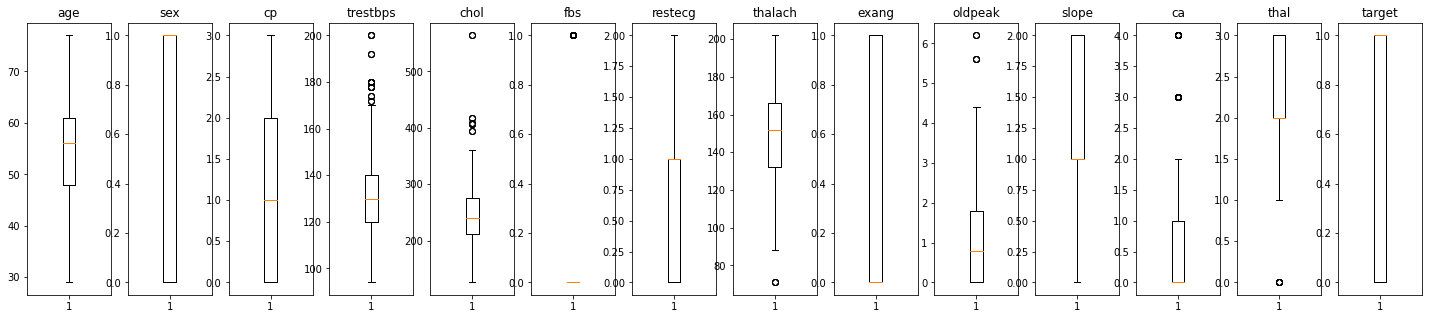

In [8]:
fig, axs = plt.subplots(ncols=len(data.columns), figsize=(25,5))
for i, col in enumerate(data.columns):
    axs[i].boxplot(data[col])
    axs[i].set_title(col)
plt.show()

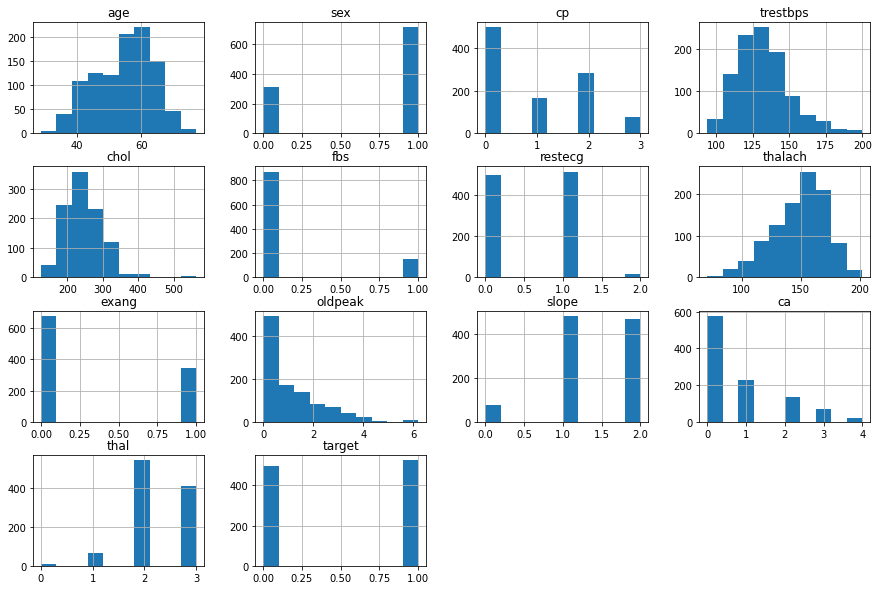

In [9]:
data.hist(figsize=(15, 10), bins=10)
plt.show()

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

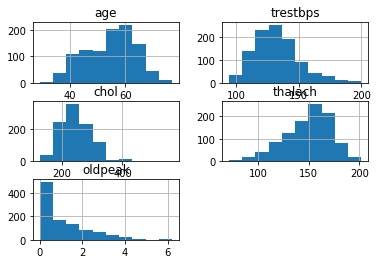

In [11]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist()

In [12]:
corr_matrix = data.corr()

In [13]:
print(corr_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

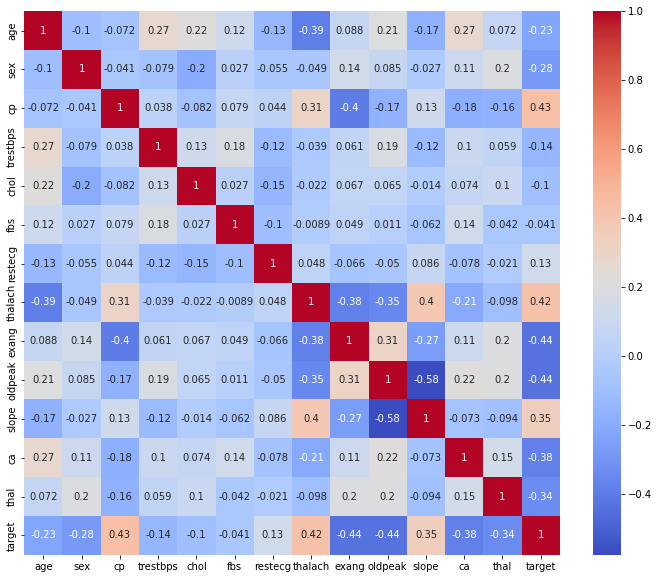

In [14]:
corr = data.corr()
plt. figure(figsize=(12,10))
sns.heatmap(corr,annot = True, cmap='coolwarm') 
plt.show()

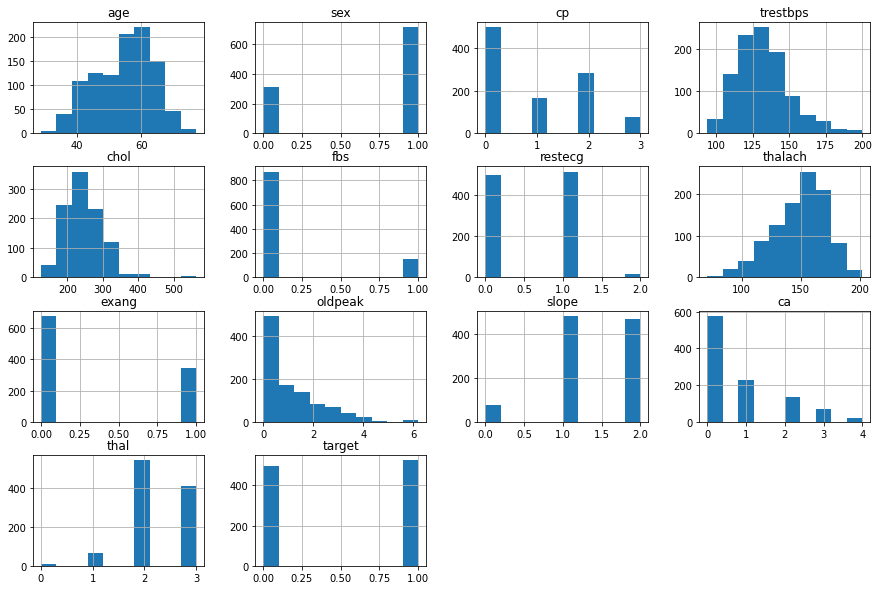

In [15]:
data.hist(figsize=(15, 10), bins=10)
plt.show()

<Figure size 1296x1080 with 0 Axes>

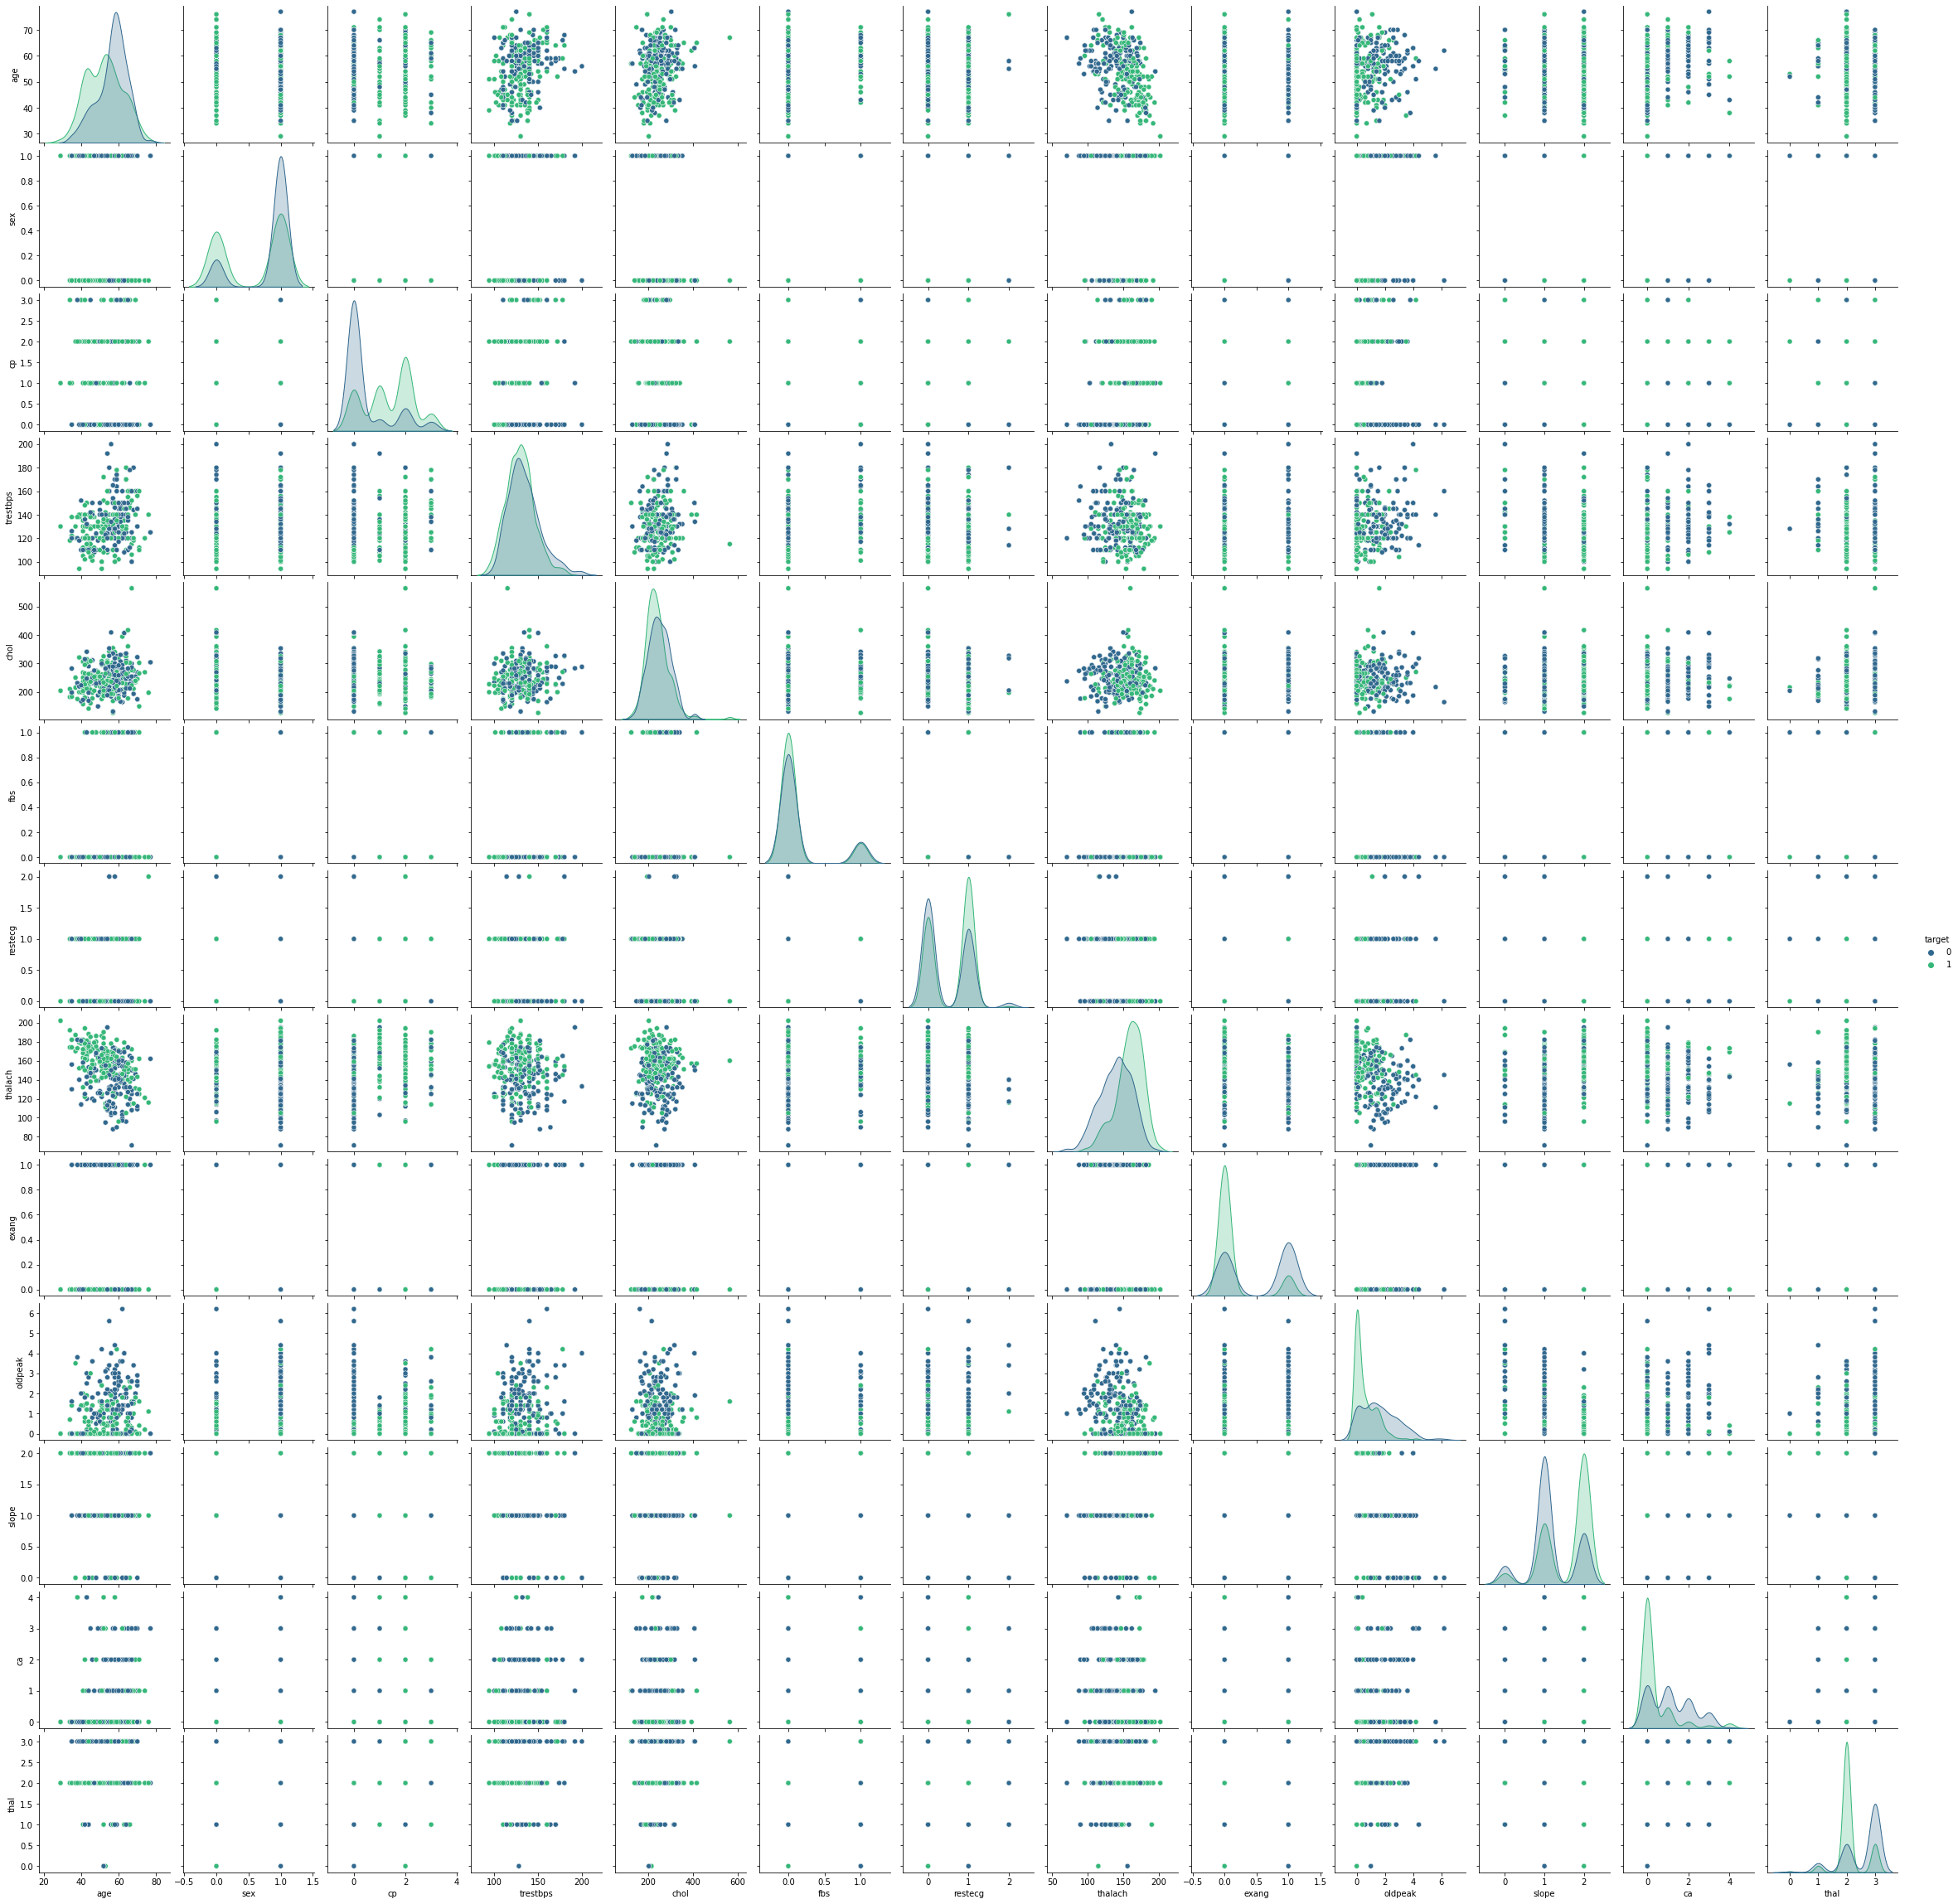

In [65]:
plt.figure(figsize=(18,15))
sns.pairplot(data=data, hue='target', palette='viridis')
plt.show()

In [16]:
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [17]:
print(data['sex'].value_counts())
print(data['fbs'].value_counts())
print(data['restecg'].value_counts())
print(data['exang'].value_counts())
print(data['slope'].value_counts())
print(data['ca'].value_counts())
print(data['thal'].value_counts())
print(data['target'].value_counts())


1    713
0    312
Name: sex, dtype: int64
0    872
1    153
Name: fbs, dtype: int64
1    513
0    497
2     15
Name: restecg, dtype: int64
0    680
1    345
Name: exang, dtype: int64
1    482
2    469
0     74
Name: slope, dtype: int64
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64
2    544
3    410
1     64
0      7
Name: thal, dtype: int64
1    526
0    499
Name: target, dtype: int64


In [18]:
data['total_risk_factor'] = 0

In [19]:
data.loc[data['trestbps'] > 140, 'total_risk_factor'] += 1
data.loc[data['chol'] > 240, 'total_risk_factor'] += 1
data.loc[data['fbs'] > 120, 'total_risk_factor'] += 1
data.loc[data['ca'] >= 1, 'total_risk_factor'] += 1
data.loc[data['thal'] == 3, 'total_risk_factor'] += 1

In [20]:
print(data[['trestbps', 'chol', 'fbs', 'ca', 'thal', 'total_risk_factor']])

      trestbps  chol  fbs  ca  thal  total_risk_factor
0          125   212    0   2     3                  2
1          140   203    1   0     3                  1
2          145   174    0   0     3                  2
3          148   203    0   1     3                  3
4          138   294    1   3     2                  2
...        ...   ...  ...  ..   ...                ...
1020       140   221    0   0     2                  0
1021       125   258    0   1     3                  3
1022       110   275    0   1     2                  2
1023       110   254    0   0     2                  1
1024       120   188    0   1     3                  2

[1025 rows x 6 columns]


In [21]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,total_risk_factor
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1


In [22]:
x = data.drop('target', axis=1)  
y = data['target']  


In [23]:
print('Variable independent:')
print(x.head())

print('\nVariable dependent:')
print(y.head())

Variable independent:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  total_risk_factor  
0   2     3                  2  
1   0     3                  1  
2   0     3                  2  
3   1     3                  3  
4   3     2                  2  

Variable dependent:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_data = pd.DataFrame(x_scaled, columns=x.columns)

In [25]:
print(x_scaled_data)

           age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0     0.675325  1.0  0.000000     0.625  0.375887  0.0      0.5  0.831683   
1     0.688312  1.0  0.000000     0.700  0.359929  1.0      0.0  0.767327   
2     0.909091  1.0  0.000000     0.725  0.308511  0.0      0.5  0.618812   
3     0.792208  1.0  0.000000     0.740  0.359929  0.0      0.5  0.797030   
4     0.805195  0.0  0.000000     0.690  0.521277  1.0      0.5  0.524752   
...        ...  ...       ...       ...       ...  ...      ...       ...   
1020  0.766234  1.0  0.333333     0.700  0.391844  0.0      0.5  0.811881   
1021  0.779221  1.0  0.000000     0.625  0.457447  0.0      0.0  0.698020   
1022  0.610390  1.0  0.000000     0.550  0.487589  0.0      0.0  0.584158   
1023  0.649351  0.0  0.000000     0.550  0.450355  0.0      0.0  0.787129   
1024  0.701299  1.0  0.000000     0.600  0.333333  0.0      0.5  0.559406   

      exang   oldpeak  slope    ca      thal  total_risk_factor  
0       0

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [28]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

820
205
820
205


In [127]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 14)
(205, 14)
(820,)
(205,)


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [128]:
# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    indices = np.random.choice(range(len(x_scaled)), size=len(y), replace=True)
    X_boot = x_scaled[indices]
    y_boot = y[indices]
    # Train the model on the bootstrap sample
    model.fit(X_boot, y_boot)
    # Evaluate the model on the entire dataset
    accuracy = model.score(x_scaled, y)
    accuracies.append(accuracy)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean accuracy: 0.99
95% confidence interval: [0.98, 1.00]


In [129]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
model1 = DecisionTreeClassifier(max_depth=3)
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [130]:
y_pred1 = model1.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y_pred1)
print('Accuracy model Decision Tree:', accuracy1)

Accuracy model Decision Tree: 0.751219512195122


In [131]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,total_risk_factor
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1


In [132]:

arr=np.array([[59,1,1,140,221,0,1,164,1,0.0,2,0,2,0]])
result=model1.predict(arr)
print(result[0])

1


RANDOM FOREST


In [133]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
model2 = RandomForestClassifier(n_estimators=100, max_depth=3)

# Train the model
model2.fit(x_train, y_train)

# Make predictions
y_pred2 = model2.predict(x_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print("Akurasi model Random Forest :", accuracy2)

Akurasi model Random Forest : 0.8097560975609757


In [134]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       102
           1       0.79      0.85      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [136]:
# Create logistic regression object
model3 = LogisticRegression()

# Fit the model with data
model3.fit(x_train, y_train)

# Predict the response for test dataset
y_pred3 = model3.predict(x_test)

# Calculate the accuracy score
accuracy3 = accuracy_score(y_test, y_pred3)
print("Akurasi model Logistic Regression:", accuracy3)

Akurasi model Logistic Regression: 0.8146341463414634


In [137]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.88      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [138]:
from sklearn.naive_bayes import GaussianNB

# Inisiasi model Gaussian Naive Bayes
model4 = GaussianNB()

# Latih model dengan data training
model4.fit(x_train, y_train)

# Buat prediksi menggunakan data testing
y_pred4 = model4.predict(x_test)

# Evaluasi performa model
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_test, y_pred4)

# Memunculkan akurasi
print("Akurasi model Naive Bayes:", accuracy4)

Akurasi model Naive Bayes: 0.8146341463414634


In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.87      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [140]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
model5 = GradientBoostingClassifier()

# Fit the model to the training data
model5.fit(x_train, y_train)

# Make predictions on the test data
y_pred5 = model5.predict(x_test)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred5)

# Memunculkan akurasi
print("Akurasi model Geadient Boosting :", accuracy5)

Akurasi model Geadient Boosting : 0.9365853658536586


In [141]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       102
           1       0.95      0.92      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [29]:
import random


In [37]:
ca=random.randint(0,2)
print(ca)

2


In [38]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,total_risk_factor
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1
